In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [4]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [5]:
y_pred = mlp_model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9348813730439172


In [7]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1624
           1       0.78      0.89      0.83       357

    accuracy                           0.93      1981
   macro avg       0.88      0.92      0.90      1981
weighted avg       0.94      0.93      0.94      1981



In [8]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

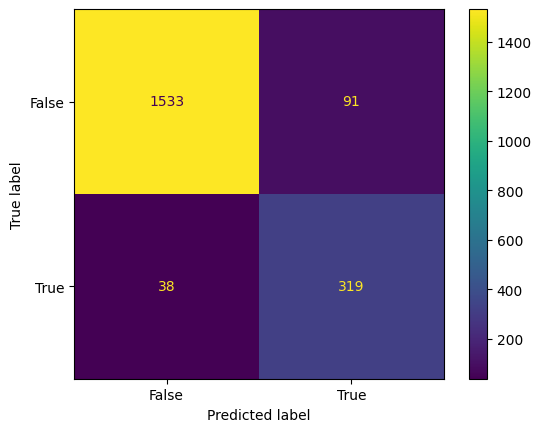

In [9]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [10]:
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'relu', 'tanh'],  
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 400],
    'tol': [1e-3, 1e-4, 1e-5],
}

In [11]:
grid_search = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=0.001;, score=0.817 total time=   1.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=0.001;, score=0.818 total time=   1.6s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=0.001;, score=0.818 total time=   2.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=0.001;, score=0.818 total time=   1.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=0.001;, score=0.818 total time=   1.7s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, m

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=1e-05;, score=0.817 total time=  14.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=1e-05;, score=0.818 total time=  15.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=1e-05;, score=0.818 total time=  19.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=1e-05;, score=0.818 total time=  18.6s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=sgd, tol=1e-05;, score=0.818 total time=   5.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.001;, score=0.935 total time=   9.6s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.001;, score=0.928 total time=   9.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.001;, score=0.938 total time=   9.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.001;, score=0.934 total time=  

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.0001;, score=0.931 total time=  20.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.0001;, score=0.920 total time=  21.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.0001;, score=0.921 total time=  19.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=200, solver=adam, tol=0.0001;, score=0.818 total time=   1.0s


In [ ]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
best_mlp_model = grid_search.best_estimator_

In [ ]:
best_mlp_model.fit(X_train, y_train)

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(20,))

In [ ]:
grid_pred = best_mlp_model.predict(X_test)

In [ ]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9475043029259896


In [ ]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1829
           1       0.95      0.80      0.87       495

    accuracy                           0.95      2324
   macro avg       0.95      0.89      0.92      2324
weighted avg       0.95      0.95      0.95      2324



In [ ]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

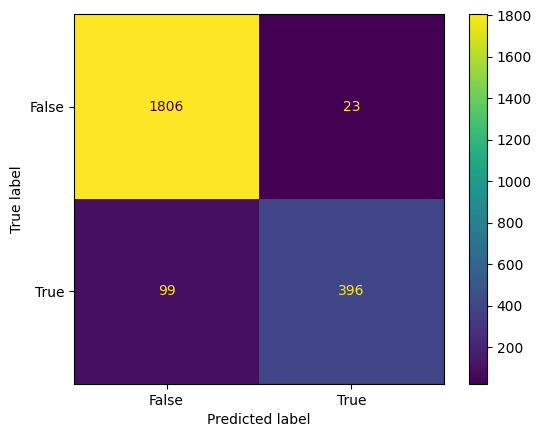

In [ ]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

processed_test_text = finalpreprocess(test_text)

print("Texto de teste após pré-processamento:", processed_test_text)

prediction = best_decision_tree_model.predict(processed_test_text)

if prediction[0]:
    print("O texto é spam!")
else:
    print("O texto não é spam (ham)!")